# **PROJETO FINAL CURSO PYTHON PARA CIÊNCIA DE DADOS - EBAC**




### **1) RESUMO**

Análise de adimplência e inadimplência a partir da base dados de crédito. 

Para adimplência e inadimplência considerar "Default"


-adimplente: **0** e -inadimplente: **1**

### **2) IMPORTAÇÃO DE PACOTES**

In [287]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### **3) LEITURA DO ARQUIVO**

In [289]:
base = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values=['na'])

### **4) EXPLORAÇÃO DE DADOS**

In [290]:
# Visualizando primeiras e últimas linhas e tamanho da base
display(base)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,M,2,mestrado,solteiro,$40K - $60K,blue,40,3,3,2,"4.003,91","15.476,26",117
10123,710638233,1,41,M,2,NaN,divorciado,$40K - $60K,blue,25,4,3,2,"4.277,04","8.764,88",69
10124,716506083,1,44,F,1,ensino medio,casado,menos que $40K,blue,36,5,4,3,"5.409,16","10.291,78",60
10125,717406983,1,30,M,2,mestrado,NaN,$40K - $60K,blue,36,4,3,3,"5.281,84","8.395,62",62


In [291]:
#Ver as informações da base - tipo, não nulos, colunas e linhas:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             8608 non-null   object
 6   estado_civil             9378 non-null   object
 7   salario_anual            9015 non-null   object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

In [292]:
#Somar quantidade de números nulos 
base.isnull().sum()

id                            0
default                       0
idade                         0
sexo                          0
dependentes                   0
escolaridade               1519
estado_civil                749
salario_anual              1112
tipo_cartao                   0
meses_de_relacionamento       0
qtd_produtos                  0
iteracoes_12m                 0
meses_inativo_12m             0
limite_credito                0
valor_transacoes_12m          0
qtd_transacoes_12m            0
dtype: int64

In [293]:
#Pesquisar quantidade de números não únicos
base.nunique()

id                         10127
default                        2
idade                         45
sexo                           2
dependentes                    6
escolaridade                   5
estado_civil                   3
salario_anual                  5
tipo_cartao                    4
meses_de_relacionamento       44
qtd_produtos                   6
iteracoes_12m                  7
meses_inativo_12m              7
limite_credito              9272
valor_transacoes_12m       10035
qtd_transacoes_12m           126
dtype: int64

In [294]:
#Resumo estatístico da base
base.describe()

,id,default,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,qtd_transacoes_12m
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,0.160660,46.325960,2.346203,35.928409,3.812580,2.455317,2.341167,64.858695
std,3.690378e+07,0.367235,8.016814,1.298908,7.986416,1.554408,1.106225,1.010622,23.472570
min,7.080821e+08,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,10.000000
25%,7.130368e+08,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,45.000000
50%,7.179264e+08,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,67.000000
75%,7.731435e+08,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,81.000000
max,8.283431e+08,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,139.000000


In [295]:
#Quantidade de adimplentes e inadimplentes
base.default.value_counts()

0    8500
1    1627
Name: default, dtype: int64

In [296]:
#PORCENTAGEM DEFAULT
qtd_total, _ = base.shape
qtd_adimplentes, _ = base[base['default'] == 0].shape
qtd_inadimplentes, _ = base[base['default'] == 1].shape

print(f"A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

A proporcão adimplentes ativos é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


In [297]:
#Tendência de correlação entre as variáveis
base.corr()

,id,default,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,qtd_transacoes_12m
id,1.000000,-0.046430,0.007613,0.006772,0.134588,0.006907,0.005694,0.005729,-0.002961
default,-0.046430,1.000000,0.018203,0.018991,0.013687,-0.150005,0.204491,0.152449,-0.371403
idade,0.007613,0.018203,1.000000,-0.122254,0.788912,-0.010931,-0.018452,0.054361,-0.067097
dependentes,0.006772,0.018991,-0.122254,1.000000,-0.103062,-0.039076,-0.040505,-0.010768,0.049912
meses_de_relacionamento,0.134588,0.013687,0.788912,-0.103062,1.000000,-0.009203,-0.010774,0.074164,-0.049819
qtd_produtos,0.006907,-0.150005,-0.010931,-0.039076,-0.009203,1.000000,0.055203,-0.003675,-0.241891
iteracoes_12m,0.005694,0.204491,-0.018452,-0.040505,-0.010774,0.055203,1.000000,0.029493,-0.152213
meses_inativo_12m,0.005729,0.152449,0.054361,-0.010768,0.074164,-0.003675,0.029493,1.000000,-0.042787
qtd_transacoes_12m,-0.002961,-0.371403,-0.067097,0.049912,-0.049819,-0.241891,-0.152213,-0.042787,1.000000


<AxesSubplot:>

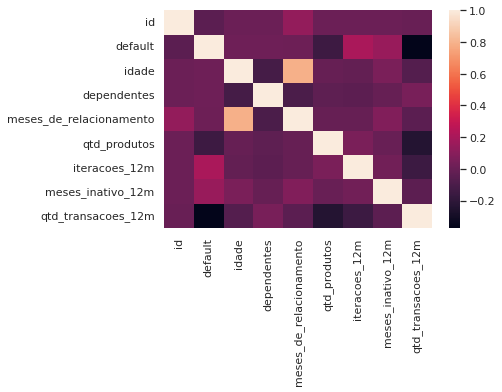

In [298]:
#heatmap do seaborn para tornar essa matriz mais visual
sns.heatmap(base.corr())

###**5) TRATAMENTO DE DADOS**

Tratar dados:

*   escolaridade=1519 ; estado_civil=749; salario_anual=1112
*   excluir coluna 'id'
*   trocar 'valor_transacoes_12m' e 'qtd_transacoes_12m' p/ float

In [299]:
#exclusão da coluna 'ID'
base = base.drop('id', axis=1)

In [300]:
#Troca de object para float
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

base['valor_transacoes_12m'] = base['valor_transacoes_12m'].apply(fn)
base['limite_credito'] = base['limite_credito'].apply(fn)

In [301]:
#Exclusão de dados faltantes
base.dropna(inplace=True)

In [302]:
#NOVA PROPORÇÃO APÓS EXCLUSÃO DAS LINHAS
qtd_total_novo, _ = base.shape
qtd_adimplentes_novo, _ = base[base['default'] == 0].shape
qtd_inadimplentes_novo, _ = base[base['default'] == 1].shape

print(f"A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


In [303]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7081 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   default                  7081 non-null   int64  
 1   idade                    7081 non-null   int64  
 2   sexo                     7081 non-null   object 
 3   dependentes              7081 non-null   int64  
 4   escolaridade             7081 non-null   object 
 5   estado_civil             7081 non-null   object 
 6   salario_anual            7081 non-null   object 
 7   tipo_cartao              7081 non-null   object 
 8   meses_de_relacionamento  7081 non-null   int64  
 9   qtd_produtos             7081 non-null   int64  
 10  iteracoes_12m            7081 non-null   int64  
 11  meses_inativo_12m        7081 non-null   int64  
 12  limite_credito           7081 non-null   float64
 13  valor_transacoes_12m     7081 non-null   float64
 14  qtd_transacoes_12m     

In [304]:
#Nova LISTA DE TENDÊNCIA DE CORRELAÇÃO após tratamento
base.corr()

,default,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
default,1.000000,0.008735,0.011423,0.009249,-0.145713,0.193923,0.152732,-0.015816,-0.160379,-0.357261
idade,0.008735,1.000000,-0.128232,0.791271,-0.022067,-0.023971,0.057870,0.024563,-0.045859,-0.069883
dependentes,0.011423,-0.128232,1.000000,-0.112368,-0.043257,-0.055625,-0.022804,0.081378,0.023234,0.057056
meses_de_relacionamento,0.009249,0.791271,-0.112368,1.000000,-0.016751,-0.011054,0.071305,0.020103,-0.037625,-0.050445
qtd_produtos,-0.145713,-0.022067,-0.043257,-0.016751,1.000000,0.070539,0.005072,-0.074876,-0.348024,-0.246749
iteracoes_12m,0.193923,-0.023971,-0.055625,-0.011054,0.070539,1.000000,0.026269,0.016737,-0.121018,-0.155612
meses_inativo_12m,0.152732,0.057870,-0.022804,0.071305,0.005072,0.026269,1.000000,-0.015728,-0.039977,-0.048169
limite_credito,-0.015816,0.024563,0.081378,0.020103,-0.074876,0.016737,-0.015728,1.000000,0.171592,0.080834
valor_transacoes_12m,-0.160379,-0.045859,0.023234,-0.037625,-0.348024,-0.121018,-0.039977,0.171592,1.000000,0.810074
qtd_transacoes_12m,-0.357261,-0.069883,0.057056,-0.050445,-0.246749,-0.155612,-0.048169,0.080834,0.810074,1.000000


<AxesSubplot:>

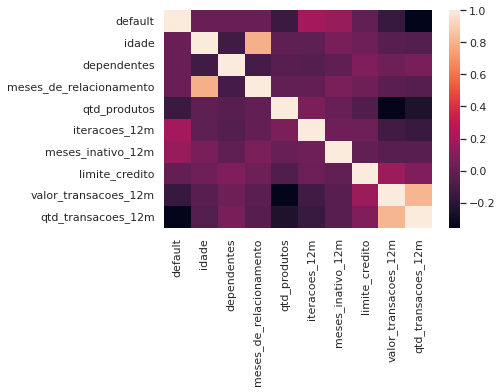

In [305]:
# Nova matriz utilizando o heatmap do seaborn para tornar mais visual
sns.heatmap(base.corr())

### **6) VISUALIZAÇÃO DOS DADOS**




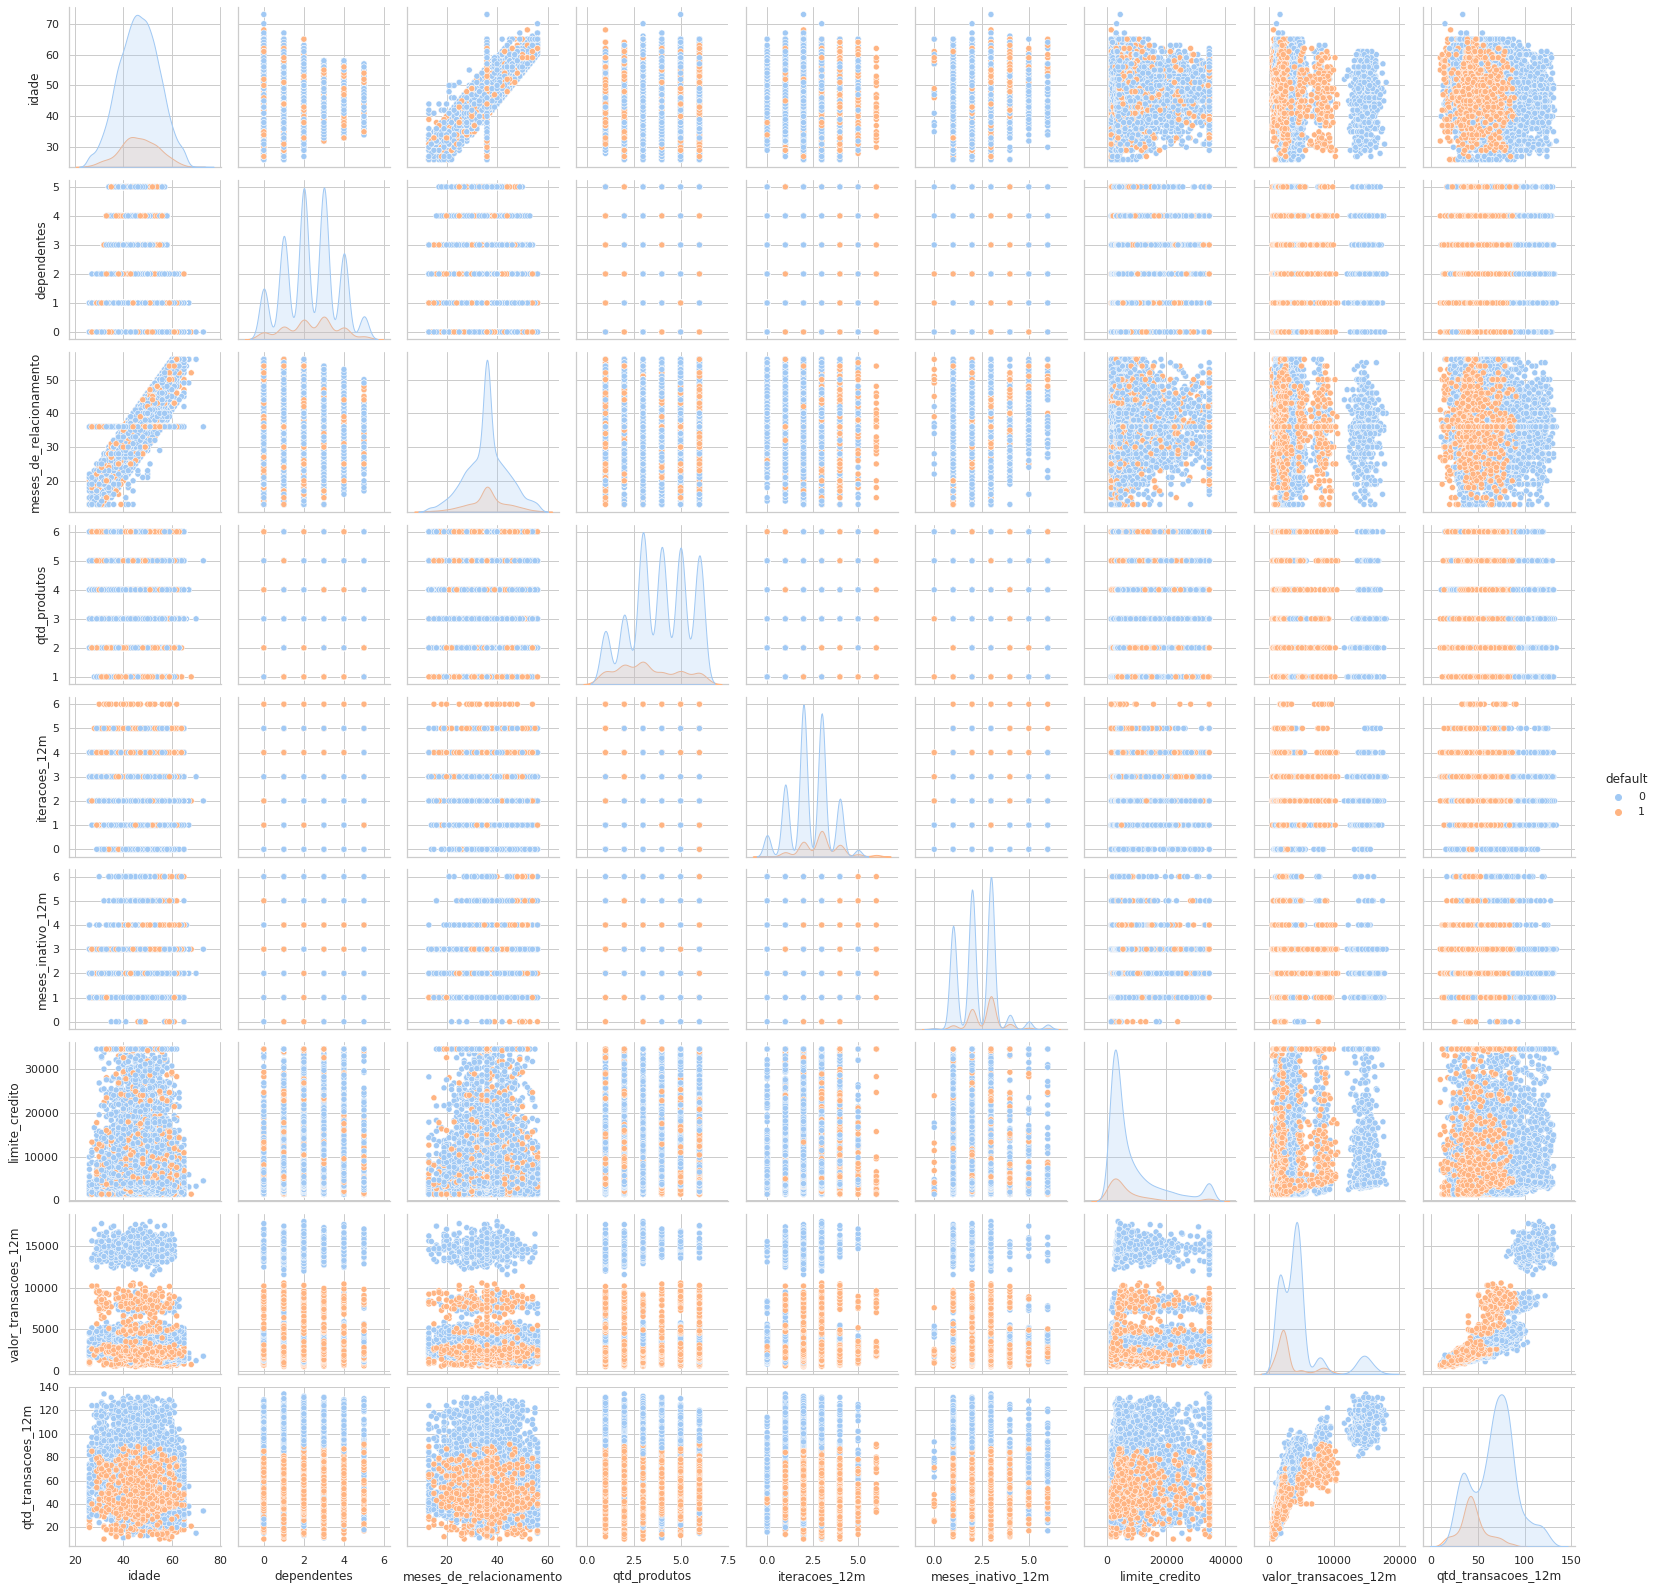

In [306]:
#  distribuições bivariadas em relação ao default
sns.pairplot(base,hue='default')

###6.1 VISUALIZAÇÃO DA ESCOLARIDADE COM DEFAULT

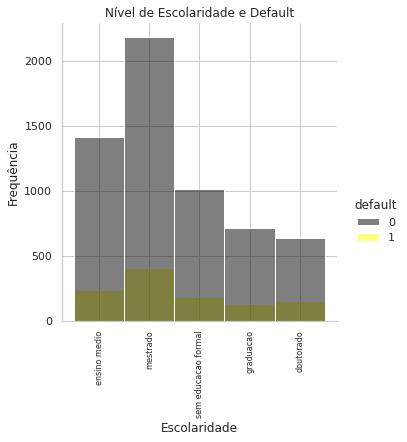

In [307]:
sns.set_style("whitegrid")

titulo = 'Nível de Escolaridade e Default'

f = sns.displot(base, x="escolaridade", hue="default", palette=['black','yellow'])
f.set_xticklabels(rotation=90, fontsize=8)
f.set(title=titulo, xlabel="Escolaridade", ylabel="Frequência")

plt.show()

### 6.2 VISUALIZAÇÃO DO PARÂMETRO "QUANTIDADE DE TRANSAÇÕES 12m"

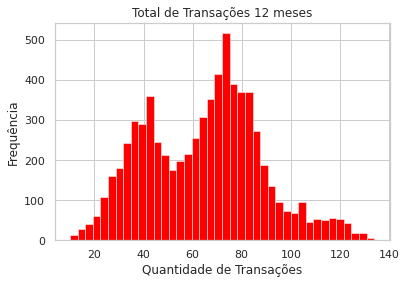

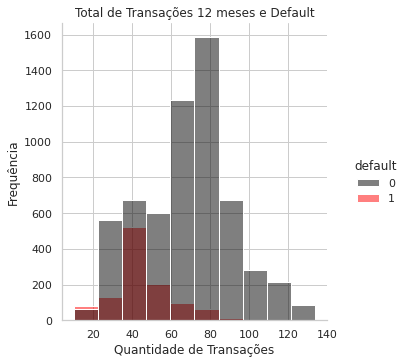

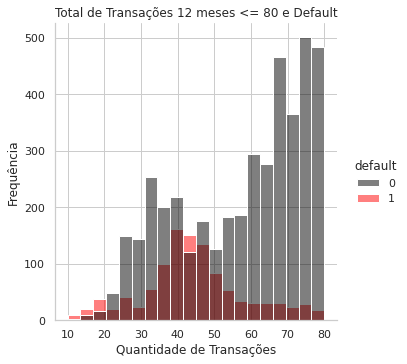

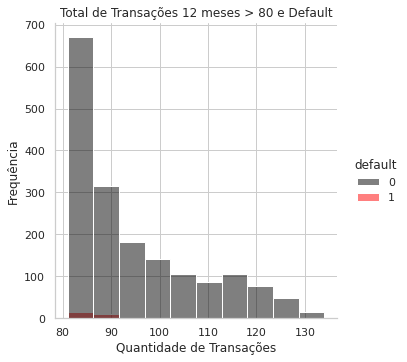

In [308]:
# Total de transações
titulo = 'Total de Transações 12 meses'
x = base.qtd_transacoes_12m 

fig, ax = plt.subplots()

ax.hist(x, bins=40, linewidth=0.5, edgecolor="white", color='red')
ax.set(title=titulo, xlabel="Quantidade de Transações", ylabel="Frequência")
plt.show()

#  QUANTIDADE DE TRANSAÇÕES X DEFAULT
titulo = 'Total de Transações 12 meses e Default'
f= sns.displot(data=base, x="qtd_transacoes_12m", hue="default", bins=10, palette=['black','red'])
f.set(title=titulo, xlabel="Quantidade de Transações", ylabel="Frequência")
plt.show()

# Total de Transações 12 meses <= 80 e Default
x = base[base.qtd_transacoes_12m <= 80].qtd_transacoes_12m
titulo = 'Total de Transações 12 meses <= 80 e Default'
f = sns.displot(data=base, x=x, hue="default", kind="hist", bins=20, palette=['black','red'])
f.set(title=titulo, xlabel="Quantidade de Transações", ylabel="Frequência")
plt.show()

# Total de Transações 12 meses > 80 e Default
x = base[base.qtd_transacoes_12m > 80].qtd_transacoes_12m
titulo = 'Total de Transações 12 meses > 80 e Default'
f = sns.displot(data=base, x=x, hue="default", kind="hist", bins=10, palette=['black','red'])
f.set(title=titulo, xlabel="Quantidade de Transações", ylabel="Frequência")
plt.show()

### 6.3 VISUALIZAÇÃO DO PARÂMETRO "VALOR TRANSAÇÕES 12m"





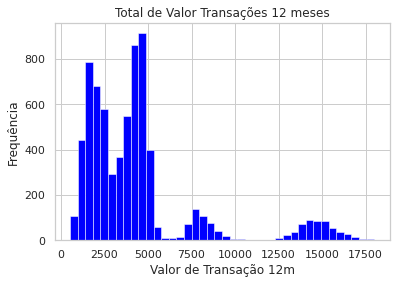

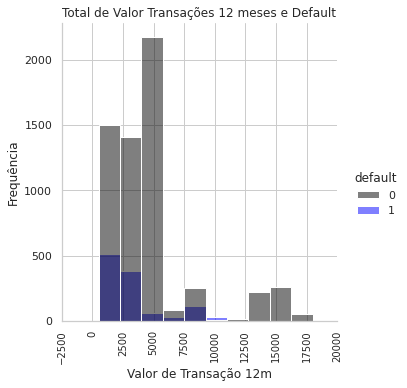

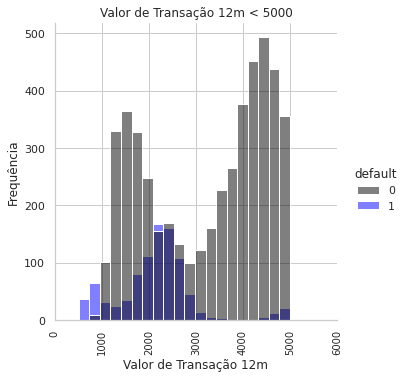

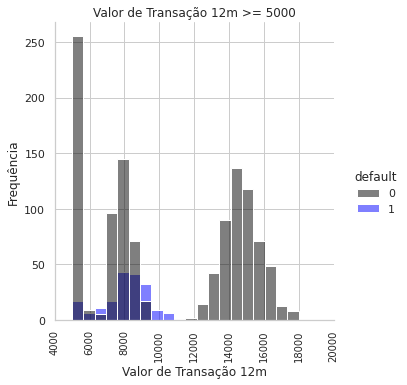

In [309]:
# Total de Valor Transações 12 meses
titulo = 'Total de Valor Transações 12 meses'
x = base.valor_transacoes_12m
fig, ax = plt.subplots()
ax.hist(x, bins=40, linewidth=0.5, edgecolor="white", color="blue")
ax.set(title=titulo, xlabel="Valor de Transação 12m", ylabel="Frequência")
plt.show()

#VALOR DE TRANSAÇÕES X DEFAULT
titulo = 'Total de Valor Transações 12 meses e Default'
f = sns.displot(data=base, x="valor_transacoes_12m", hue="default", kind="hist", bins=10, palette=['black','blue'])
f.set(title=titulo, xlabel="Valor de Transação 12m", ylabel="Frequência")
f.set_xticklabels(rotation=90, fontsize=10)

plt.show()

#VALOR DE TRANSAÇÕES 12m < 5000 X DEFAULT
titulo = 'Valor de Transação 12m < 5000'

x = base[base.valor_transacoes_12m < 5000].valor_transacoes_12m

f = sns.displot(data=base, x=x, hue="default", kind="hist", bins=20, palette=['black','blue'])
f.set(title=titulo, xlabel="Valor de Transação 12m", ylabel="Frequência")
f.set_xticklabels(rotation=90, fontsize=10)
plt.show()

#VALOR DE TRANSAÇÕES 12m > 5000 X DEFAULT
titulo = 'Valor de Transação 12m >= 5000'

x = base[base.valor_transacoes_12m >= 5000].valor_transacoes_12m

f = sns.displot(data=base, x=x, hue="default", kind="hist", bins=20, palette=['black','blue'])
f.set(title=titulo, xlabel="Valor de Transação 12m", ylabel="Frequência")
f.set_xticklabels(rotation=90, fontsize=10)
plt.show()

### 6.4 VISUALIZAÇÃO DO PARÂMETRO "TOTAL PRODUTOS


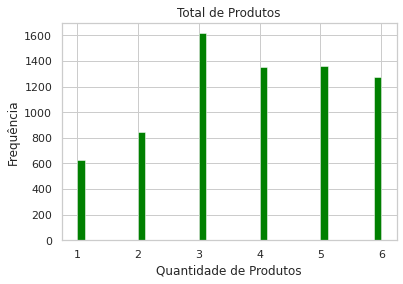

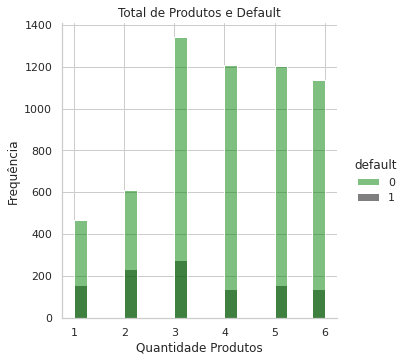

In [310]:
# TOTAL DE PRODUTOS
titulo = 'Total de Produtos'
x = base.qtd_produtos

fig, ax = plt.subplots()

ax.hist(x, bins=40, linewidth=0.5, edgecolor="white", color="green")
ax.set(title=titulo, xlabel="Quantidade de Produtos", ylabel="Frequência")
plt.show()


#Total de Produtos x Default
titulo = 'Total de Produtos e Default'
f = sns.displot(data=base, x="qtd_produtos", hue="default", kind="hist", bins=20, palette=["green", "black"])
f.set(title=titulo, xlabel="Quantidade Produtos", ylabel="Frequência")
plt.show()

### **7) INSIGHTS**



1.   A escolaridade não apresentou correlação com inadimplência dos clientes.
2.   Clientes com média de transações anuais na faixa entre *10 e 20* e *40 e 50* devem ser monitorados, pois os gráficos mostram a tendência de inadimplência.
3.   Cliente com média anual de gastos de até **1000,00** - entre **2000,00 e 3000,00** -  entre **6000,00 e R$7000,00** e **8500,00 até 11000,00** mostram grande potencialidade de inadimplência.
4.    O gráfico de Quantidade Produtos mostram que clientes com ***1 ou 2*** produtos têm maior probabilidade de inadimplência.


